# 14502번 연구소 - G4
#### 알고리즘 분류: 그래프 이론 , 그래프 탐색 너비 우선 탐색

https://www.acmicpc.net/problem/14502

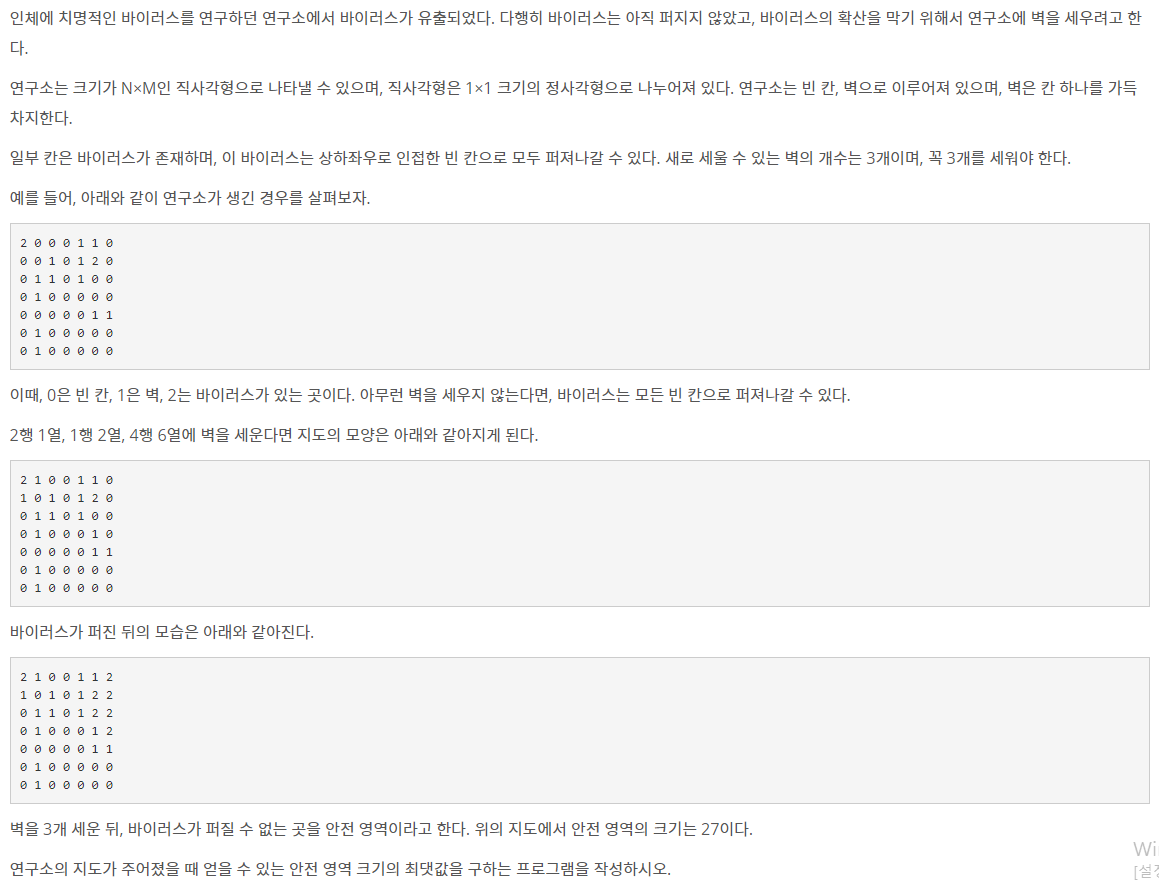

In [ ]:
n,m = map(int,input().split())
from itertools import combinations
from copy import deepcopy
graph = [list(map(int, input().split())) for _ in range(n)]
default_graph = deepcopy(graph)

from collections import deque
queue = deque()
walls = []
for i in range(n):
    for j in range(m):
        if graph[i][j] == 2:
            queue.append((i,j))
        elif graph[i][j] == 0:
            walls.append((i,j))

comb = combinations(walls,3)
default_queue = deepcopy(queue)
direction = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # up down left right
safe = 0
def dfs(graph,queue):
    count = 0
    visited = [[0] * m for _ in range(n)]

    while queue:
        x, y = queue.popleft()
        visited[x][y] = 1
        for dx, dy in direction:
            x_2, y_2 = x + dx, y + dy
            if 0 <= x_2 < n and 0 <= y_2< m and graph[x_2][y_2] == 0 and visited[x_2][y_2] == 0:
                graph[x_2][y_2] = 2
                visited[x_2][y_2] = 1
                count +=1
                queue.append((x_2, y_2))
    return count

for com in comb:
    queue = deepcopy(default_queue)
    graph = deepcopy(default_graph)

    for x,y in com:
        graph[x][y] =1

    result = dfs(graph,queue)
    safe = max(safe,len(walls)- 3 - result)

print(safe)